In [1]:
import pandas as pd
import pickle

In [2]:
with open('chi_sqaure_val_dict_1000.pickle', 'rb') as handler:
    chi_sqaure_val_dict_1000 = pickle.load(handler)

In [3]:
chi_sqaure_val_dict_1000

{'0': {'stat': 3409.6749106835423, 'p_value': 0.0},
 '35605482': {'stat': 177.535654348655, 'p_value': 2.521989074775316e-37},
 '40220357': {'stat': 595.9768584025268, 'p_value': 1.150598777892826e-127},
 '19070869': {'stat': 1260.891535863907, 'p_value': 1.002808265169686e-271},
 '320128': {'stat': 14224.9185044747, 'p_value': 0.0},
 '40162515': {'stat': 318.7384849733711, 'p_value': 9.816088849685395e-68},
 '4214956': {'stat': 84.49252717872729, 'p_value': 1.943700888352449e-17},
 '40231925': {'stat': 227.36199783211902, 'p_value': 4.8804620565218496e-48},
 '35603428': {'stat': 693.513012414176, 'p_value': 8.847856170836428e-149},
 '4132855': {'stat': 207.80787231723573, 'p_value': 7.868386094220963e-44},
 '19135374': {'stat': 81.18735422614655, 'p_value': 9.759270278341671e-17},
 '4036803': {'stat': 172.49479617952454, 'p_value': 3.047778599846367e-36},
 '40232756': {'stat': 669.4900450033344, 'p_value': 1.4063501563969653e-143},
 '40244026': {'stat': 432.4668880381082, 'p_value': 2

In [4]:
selected_features = []
for key in chi_sqaure_val_dict_1000:
    if chi_sqaure_val_dict_1000[key]['p_value'] < 0.05:
        selected_features.append(key)

In [5]:
df = pd.read_csv('concept_table.csv')

/home/pprusty/.local/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3145: DtypeWarning: Columns (2,6,7) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [6]:
df_afib=pd.read_csv("afib100.csv")

In [7]:
df_afib.head(10)

,person_id,label,diag_med
0,5558676580223352040,0,"40162515,139750,40481919,43532864,201072,31405..."
1,3936031346937118934,0,"948637,439407,372328,19047727,441408,256451,43..."
2,-5471355210746619322,0,"4209423,4094683,35604998,437175,4330445,401625..."
3,-8126400419445007346,0,"19123989,19070869,40484102,440129,40226837,356..."
4,5977111745341390134,0,"4239381,40243206,434327,432303,40220357,436222..."
5,-7730154663069766794,0,"4107655,0,372328,442077,19072933,257012,440383..."
6,-5793241709845042930,0,"257011,200831,4312538,259848,4183609,376707,19..."
7,7457814180010714588,0,"378001,375415,4331284,4168648,437175,4085923,0"
8,-4809647647394262073,0,"441259,0,77162,40162515,81151,140214"
9,-2925268929561432282,0,"312998,4169580,4053867,723042,24134,778765,190..."


In [8]:
df_afib_true = df_afib[df_afib['label'] == 1]

In [11]:
df_condition = df[df.domain_id == 'Condition']

In [13]:
condition_list = df_condition.concept_code.tolist()

In [14]:
condition_features = []
for feature in selected_features:
    if feature in condition_list:
        condition_features.append(feature)

In [15]:
condition_dict = dict(zip(df_condition.concept_code,df_condition.concept_name))

In [17]:
condition_feature_count = {}

for index, row in df_afib_true.iterrows():
    list_ids = set(row['diag_med'].split(','))
    # We want only unique values, not count multiple times for one patient
    for feature in condition_features:
        if feature in list_ids:
            if feature not in condition_feature_count:
                condition_feature_count[feature] = 0
            condition_feature_count[feature] = condition_feature_count[feature] + 1

            
                
            
    

In [19]:
hm = {k:v for k, v in sorted(condition_feature_count.items(), key = lambda x:x[1], reverse = True)}

In [20]:
hm

{'138384': 2750,
 '134736': 1794,
 '138825': 1726,
 '141932': 1254,
 '135777': 1209,
 '140673': 1202,
 '134438': 931,
 '136788': 786,
 '133299': 721,
 '141253': 585,
 '134057': 577,
 '140821': 521,
 '135360': 466,
 '137809': 438,
 '138239': 422,
 '141693': 411,
 '134898': 388,
 '138102': 377,
 '134159': 329,
 '136057': 326,
 '137351': 320,
 '138388': 317,
 '141323': 303,
 '134460': 275,
 '135930': 251,
 '138225': 234,
 '137053': 227,
 '139099': 215,
 '132736': 215,
 '136368': 214,
 '133729': 210,
 '135892': 208,
 '134441': 206,
 '138604': 202,
 '136773': 200,
 '19036004': 196,
 '139750': 195,
 '138519': 194,
 '137977': 181,
 '135333': 181,
 '132706': 176,
 '141232': 173,
 '133727': 170,
 '140168': 169,
 '137820': 169,
 '137989': 165,
 '140966': 163,
 '133414': 160,
 '140190': 158,
 '133810': 152,
 '133141': 142,
 '141104': 136,
 '134668': 131,
 '138841': 130,
 '141663': 126,
 '440009': 120,
 '136917': 118,
 '137945': 114,
 '132781': 113,
 '134452': 109,
 '139057': 108,
 '135772': 100,


In [57]:
diag_list2 = []
diag_count = []
count = 0
for key in hm:
    count = count + 1
    diag_list2.append(condition_dict[key])
    diag_count.append(hm[key])
    
    if count == 10:
        break
    
    
    

In [58]:
diag_list2[5] = 'Occupant of Military Aircraft Injured'

In [45]:
import matplotlib.pyplot as plt

In [49]:
diag_list

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

<ipython-input-59-2eeb02f5bb08>:14: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 
  plt.tight_layout()
<ipython-input-59-2eeb02f5bb08>:15: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 
  plt.savefig('/home/pprusty/google_drive/Data_science/Project/Final_report/Latex_thesis/GATechThesis/figures/ChiSquaredDiag.pdf',bbox_inches="tight")
<ipython-input-59-2eeb02f5bb08>:15: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 
  plt.savefig('/home/pprusty/google_drive/Data_science/Project/Final_report/Latex_thesis/GATechThesis/figures/ChiSquaredDiag.pdf',bbox_inches="tight")
/home/pprusty/.local/lib/python3.8/site-packages/IPython/core/pylabtools.py:132: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enoug

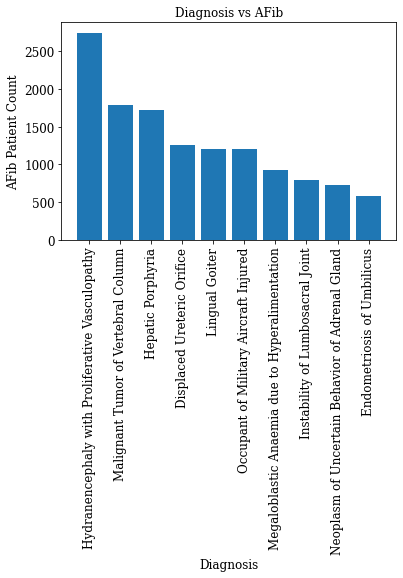

In [59]:
from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})
plt.tight_layout()
#plt.rc('text', usetex=False)
plt.rc('font', family='serif')
plt.rc('xtick', labelsize=12) 
plt.rc('ytick', labelsize=12) 
plt.xticks(rotation=90)
plt.bar(diag_list2, diag_count)
plt.xlabel('Diagnosis',fontsize=12)
plt.ylabel('AFib Patient Count',fontsize=12)
plt.title('Diagnosis vs AFib')
#plt.xticks(diag_list2)
plt.tight_layout()
plt.savefig('/home/pprusty/google_drive/Data_science/Project/Final_report/Latex_thesis/GATechThesis/figures/ChiSquaredDiag.pdf',bbox_inches="tight")
plt.show()

## Medications

In [60]:
df.domain_id

0                 Drug
1          Measurement
2          Observation
3            Procedure
4          Observation
              ...     
4736734           Drug
4736735           Drug
4736736           Drug
4736737           Drug
4736738           Drug
Name: domain_id, Length: 4736739, dtype: object

In [62]:
df_drug = df[df.domain_id == 'Drug']

In [88]:
drug_list = df_drug.concept_code.tolist()

In [89]:
len(drug_list)

3552252

In [64]:
drug_features = []
for feature in selected_features:
    if feature in drug_list:
        drug_features.append(feature)
        
drug_dict = dict(zip(df_drug.concept_code,df_drug.concept_name))

In [90]:
drug_feature_count = {}

for index, row in df_afib_true.iterrows():
    list_ids = set(row['diag_med'].split(','))
    # We want only unique values, not count multiple times for one patient
    for feature in drug_features:
        if feature in list_ids:
            if feature not in drug_feature_count:
                drug_feature_count[feature] = 0
            drug_feature_count[feature] = drug_feature_count[feature] + 1

In [91]:
len(drug_feature_count)

487

In [94]:
hm2 = {k:v for k, v in sorted(drug_feature_count.items(), key = lambda x:x[1], reverse = True)}

In [96]:
drug_list = []
drug_count = []
count = 0
for key in hm2:
    count = count + 1

    drug_list.append(drug_dict[key])
    drug_count.append(hm2[key])

    if count == 10:
        break

In [97]:
drug_list

['Pilocarpine 20 MG/ML Ophthalmic Solution',
 'Diazepam 3 MG',
 'flupirtine 75 MG',
 'Bendroflumethiazide / Meprobamate Oral Tablet',
 'Aspirin 325 MG / Diphenhydramine 38 MG Oral Tablet',
 'Promazine 10 MG Delayed Release Oral Tablet',
 'halometasone / Triclosan Topical Cream',
 'alpha-amylase Oral Tablet',
 'Triamcinolone 0.000066 MG/MG Topical Spray',
 'Dihydrotachysterol 0.2 MG/ML Oral Solution']

<ipython-input-84-4751f77ac526>:14: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 
  plt.tight_layout()
<ipython-input-84-4751f77ac526>:15: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 
  plt.savefig('/home/pprusty/google_drive/Data_science/Project/Final_report/Latex_thesis/GATechThesis/figures/ChiSquaredMed.pdf',bbox_inches="tight")
<ipython-input-84-4751f77ac526>:15: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 
  plt.savefig('/home/pprusty/google_drive/Data_science/Project/Final_report/Latex_thesis/GATechThesis/figures/ChiSquaredMed.pdf',bbox_inches="tight")
/home/pprusty/.local/lib/python3.8/site-packages/IPython/core/pylabtools.py:132: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough 

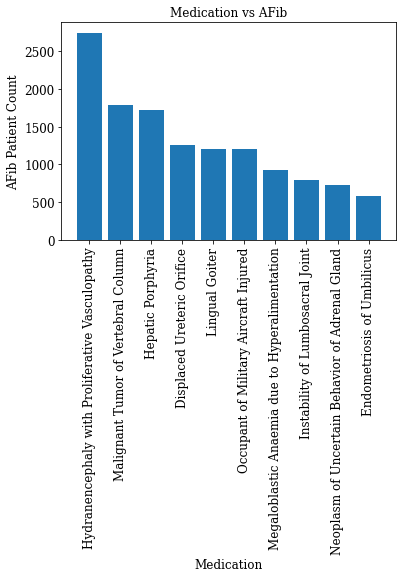

In [84]:
from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})
plt.tight_layout()
#plt.rc('text', usetex=False)
plt.rc('font', family='serif')
plt.rc('xtick', labelsize=12) 
plt.rc('ytick', labelsize=12) 
plt.xticks(rotation=90)
plt.bar(diag_list2, diag_count)
plt.xlabel('Medication',fontsize=12)
plt.ylabel('AFib Patient Count',fontsize=12)
plt.title('Medication vs AFib')
#plt.xticks(diag_list2)
plt.tight_layout()
plt.savefig('/home/pprusty/google_drive/Data_science/Project/Final_report/Latex_thesis/GATechThesis/figures/ChiSquaredMed.pdf',bbox_inches="tight")
plt.show()